## Importing necessory libraries

In [ ]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

## **Loading the data, normalizing and rescaling**

In [ ]:
(x_train, _), (_, _) = mnist.load_data()
x_train = (x_train.astype("float32") - 127.5) / 127.5
x_train = x_train.reshape((-1, 784))

11490434/11490434 [==============================] - 2s 0us/step


## **Generator model**

In [ ]:
generator = Sequential()

generator.add(Dense(units=256, input_dim=100))
generator.add(LeakyReLU(0.2))

generator.add(Dense(units=512))
generator.add(LeakyReLU(0.2))

generator.add(Dense(units=512))
generator.add(LeakyReLU(0.2))

generator.add(Dense(units=784, activation="tanh"))


generator.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.5),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

## **Descriminator model**

In [ ]:
descriminator = Sequential()

descriminator.add(Dense(units=1024, input_dim=784))
descriminator.add(LeakyReLU(0.2))
descriminator.add(Dropout(0.2))

descriminator.add(Dense(units=512))
descriminator.add(LeakyReLU(0.2))
descriminator.add(Dropout(0.2))

descriminator.add(Dense(units=256))
descriminator.add(LeakyReLU(0.2))
descriminator.add(Dropout(0.2))

descriminator.add(Dense(units=128))
descriminator.add(LeakyReLU(0.2))
descriminator.add(Dropout(0.2))

descriminator.add(Dense(units=1, activation="sigmoid"))

descriminator.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.5),
                      loss="binary_crossentropy",
                      metrics=["accuracy"])

## **Building GAN**

In [ ]:
descriminator.trainable = False

gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = descriminator(x)

gan = Model(inputs=gan_input, outputs=gan_output)

gan.compile(optimizer=Adam(),
            loss="binary_crossentropy",
            metrics=["accuracy"])

In [ ]:
epochs = 1000
sample_size = 32

for e in tqdm.tqdm(range(epochs)):

  z = np.random.normal(size=(sample_size, 100))

  gen_img = generator.predict(z, verbose=0)
  x_rand = x_train[np.random.randint(0, x_train.shape[0], size=(sample_size,))]

  sample_x = np.concatenate([gen_img, x_rand])
  sample_y = np.zeros(2*sample_size)
  sample_y[sample_size:] += 0.9

  descriminator.trainable = True
  descriminator.fit(sample_x, sample_y, verbose=0)

  descriminator.trainable = False

  x_gen = np.random.normal(size=(sample_size, 100))
  y_gen = np.ones(sample_size)

  gan.fit(x_gen, y_gen, verbose=0)

100%|██████████| 1000/1000 [03:06<00:00,  5.37it/s]


In [ ]:
z_test = np.random.normal(size=(10, 100))
imgs = generator.predict(z_test)

1/1 [==============================] - 0s 58ms/step


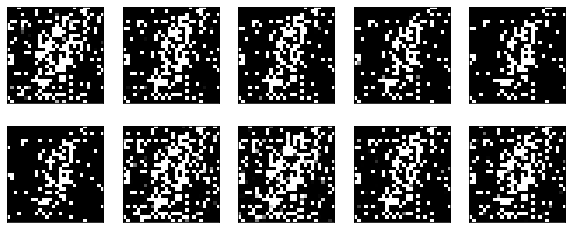

In [ ]:
fig = plt.figure(figsize=(10, 4))
for i in range(10):
  ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
  ax.imshow(imgs[i].reshape((28, 28, 1)), cmap="gray")